In [1]:
from pmdarima import auto_arima 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np                  
import matplotlib.pyplot as plt                    # plots
import seaborn as sns                              # more plots
from dateutil.relativedelta import relativedelta   # working with dates with style
%matplotlib inline
from datetime import datetime, timedelta
from scipy import stats
from math import sqrt
from sklearn.metrics import mean_squared_error
from math import sqrt
import statistics

In [2]:
data = pd.read_excel(r'C:\Users\u22v09\Desktop\Billing Data 2016 to July 2020.xlsx',skiprows=3)

In [3]:
# data[['Customer Segment']].bfill(axis = 0) 
data['Customer Segment ']= data['Customer Segment '].fillna(method = "ffill")

In [4]:
#data=data[data['Customer Segment ']== 'DIR']

In [5]:
data.drop('Grand Total', axis = 1, inplace = True)
data=pd.melt(data, id_vars =['Month','Customer Segment '])
data=data.dropna()


In [6]:
data.columns

Index(['Month', 'Customer Segment ', 'variable', 'value'], dtype='object')

In [7]:
df=data.copy()
df['Date'] =pd.to_datetime(df.variable.astype(str) + '/' + df.Month.astype(str) + '/01')

df.head()

,Month,Customer Segment,variable,value,Date
0,Jan,DIR,2016,80.867485,2016-01-01
1,Feb,DIR,2016,173.982527,2016-02-01
2,March,DIR,2016,159.529362,2016-03-01
3,April,DIR,2016,96.101656,2016-04-01
4,May,DIR,2016,105.910721,2016-05-01


In [8]:
df = df.sort_values('Date')
df = df.set_index('Date')
df=df.rename(columns={'value':'ASP','variable':'Year'})

In [9]:
df.head()

,Month,Customer Segment,Year,ASP
Date,,,,
2016-01-01,Jan,DIR,2016,80.867485
2016-01-01,Jan,OEM,2016,0.000000
2016-01-01,Jan,Networking,2016,10.367355
2016-01-01,Jan,Govt.,2016,0.000000
2016-01-01,Jan,Service,2016,39.269113


# 1. DIR

In [10]:
df_dir = df[df['Customer Segment '] == 'DIR']
df_dir[['ASP']].describe()

,ASP
count,55.000000
mean,154.820453
std,93.387414
min,0.000000
25%,108.402441
50%,131.805930
75%,162.739196
max,500.354775


In [11]:
df_dir = pd.DataFrame(df_dir.groupby(['Year', 'Month'])['ASP'].sum()).reset_index()
df_dir['Date'] = pd.to_datetime(df_dir.Year.astype(str) + '/' + df_dir.Month.astype(str) + '/01')
df_dir = df_dir.sort_values('Date')
df_dir = df_dir.set_index('Date')
df_dir = df_dir[['ASP']]
df_dir.index.freq = 'MS'
df_dir.head()

,ASP
Date,
2016-01-01,80.867485
2016-02-01,173.982527
2016-03-01,159.529362
2016-04-01,96.101656
2016-05-01,105.910721


### Augmented Dickey-Fuller Test

### The more negative this ADF statistic, the more likely we are to reject the null hypothesis.

- **Null Hypothesis (H0):** If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

- **Alternate Hypothesis (H1):** The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

    - **p-value > 0.05:** Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
    - **p-value <= 0.05:** Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [12]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_dir['ASP'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.396862
p-value: 0.011066
Critical Values:
	1%: -3.558
	5%: -2.917
	10%: -2.596


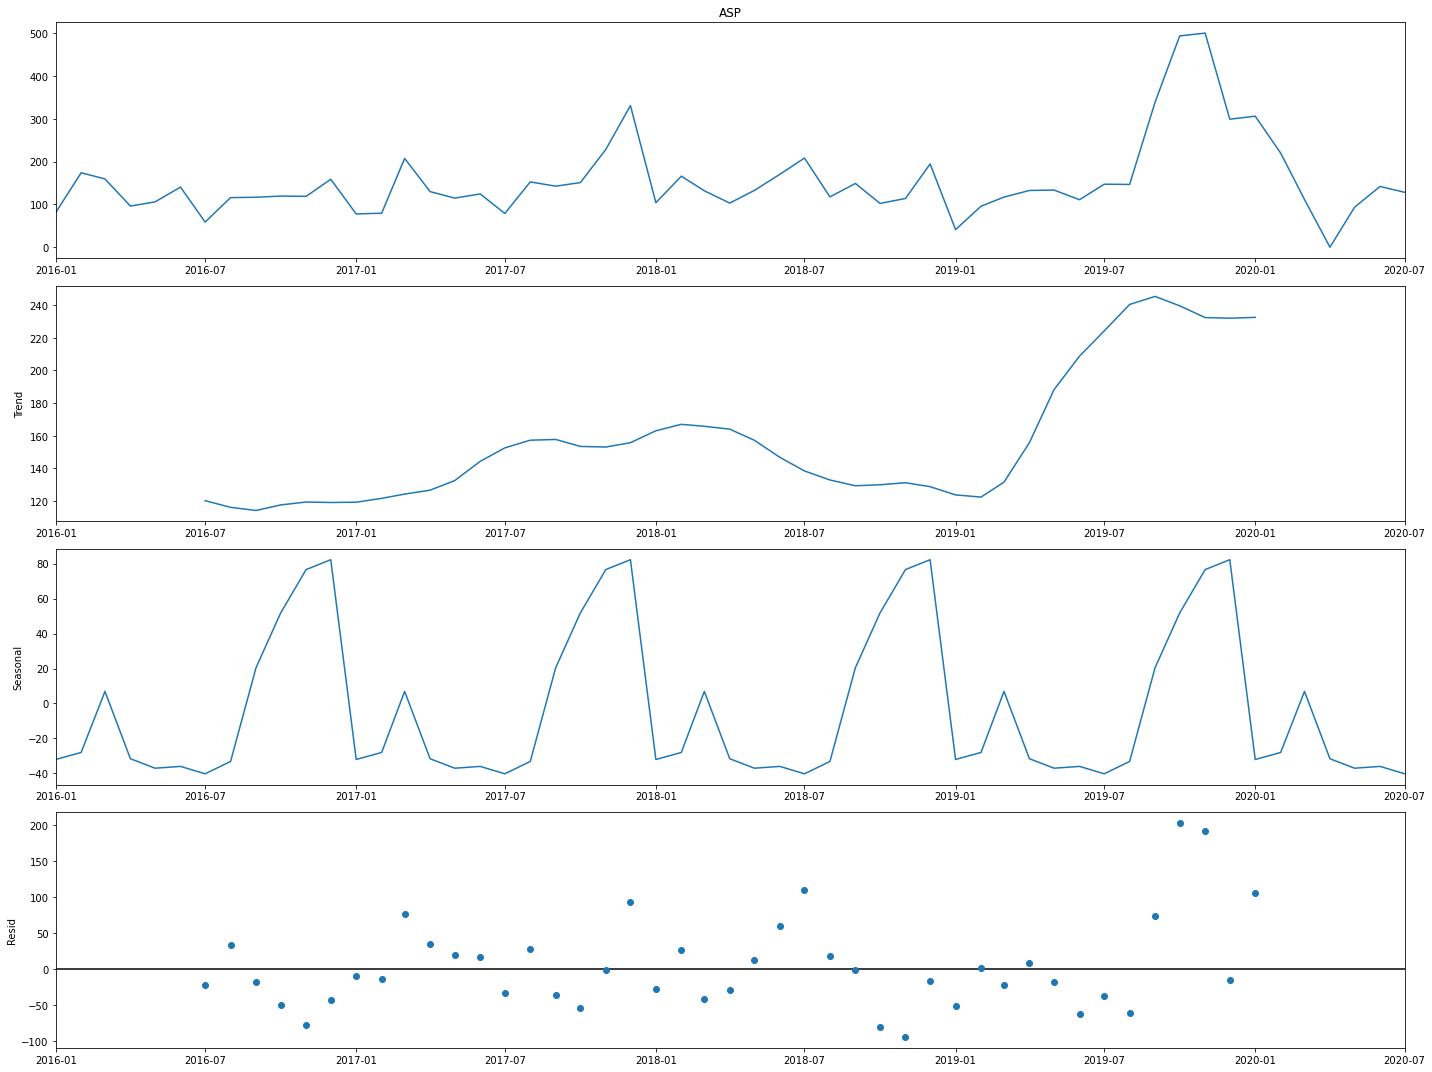

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from pylab import rcParams
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
res = sm.tsa.seasonal_decompose(df_dir.ASP)
res.plot()
plt.show()

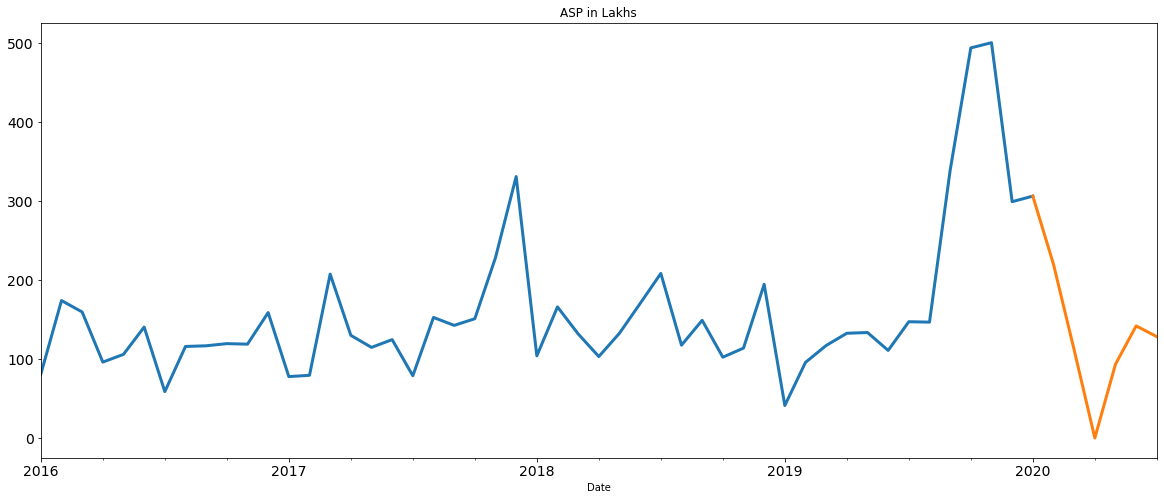

In [14]:
point = '2020-01-01'
train = df_dir[:point]
test = df_dir[point:]
#Plotting data
train.ASP.plot(figsize = (20,8), title = 'ASP in Lakhs', fontsize=14, lw = 3)
test.ASP.plot(figsize = (20,8), title = 'ASP in Lakhs', fontsize=14, lw = 3)
plt.show()

In [15]:
import warnings
warnings.filterwarnings("ignore") 
data = df_dir.copy()
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(df_dir['ASP'], start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, d = None, D = 1, trace = True, 
                          error_action ='ignore', suppress_warnings = True, stepwise = True)          

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=511.961, BIC=520.767, Time=0.329 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=533.388, BIC=536.910, Time=0.007 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=510.932, BIC=517.976, Time=0.214 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=515.195, BIC=522.240, Time=0.232 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=534.460, BIC=536.221, Time=0.009 seconds
Fit ARIMA(1,0,0)x(0,1,0,12) [intercept=True]; AIC=513.583, BIC=518.867, Time=0.041 seconds
Fit ARIMA(1,0,0)x(2,1,0,12) [intercept=True]; AIC=512.249, BIC=521.055, Time=0.557 seconds
Fit ARIMA(1,0,0)x(1,1,1,12) [intercept=True]; AIC=512.006, BIC=520.812, Time=0.338 seconds
Fit ARIMA(1,0,0)x(0,1,1,12) [intercept=True]; AIC=510.007, BIC=517.051, Time=0.200 seconds
Fit ARIMA(1,0,0)x(0,1,2,12) [intercept=True]; AIC=512.006, BIC=520.812, Time=0.572 seconds
Fit ARIMA(1,0,0)x(1,1,2,12) [intercept=True]; 

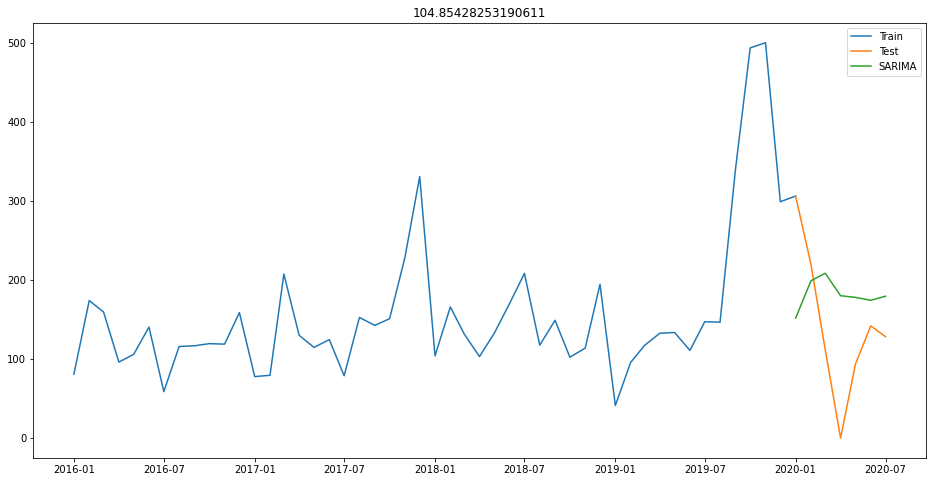

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
y_hat_avg = test.copy()
fit1 = SARIMAX(train.ASP, order=(2, 0, 1),seasonal_order=(0, 1, 1, 12)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start=test.index.min(), end=test.index.max(), dynamic=True)
output = pd.DataFrame(y_hat_avg['SARIMA']).merge(test, left_index=True, right_index=True).rename(columns={0:'Predicted', 'ASP':'Test'})
rms = sqrt(mean_squared_error(test.ASP, y_hat_avg.SARIMA))

plt.figure(figsize=(16,8))
plt.plot( train['ASP'], label='Train')
plt.plot(test['ASP'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.title(rms)
plt.show()

In [17]:
output

,SARIMA,Test
Date,,
2020-01-01,151.762042,306.175585
2020-02-01,199.018530,219.884278
2020-03-01,208.549005,111.507920
2020-04-01,180.095621,0.000000
2020-05-01,178.029549,93.440367
2020-06-01,174.331490,141.912017
2020-07-01,179.503016,128.275433


# 2. Govt

In [18]:
df_govt = df[df['Customer Segment '] == 'Govt.']
df_govt[['ASP']].describe()

,ASP
count,55.000000
mean,8.694363
std,16.419930
min,-3.500000
25%,0.000000
50%,0.000000
75%,9.218740
max,86.134700


In [19]:
df_govt = pd.DataFrame(df_govt.groupby(['Year', 'Month'])['ASP'].sum()).reset_index()
df_govt['Date'] = pd.to_datetime(df_govt.Year.astype(str) + '/' + df_govt.Month.astype(str) + '/01')
df_govt = df_govt.sort_values('Date')
df_govt = df_govt.set_index('Date')
df_govt = df_govt[['ASP']]
df_govt.index.freq = 'MS'
df_govt.head()

,ASP
Date,
2016-01-01,0.00
2016-02-01,0.00
2016-03-01,26.25
2016-04-01,15.75
2016-05-01,18.54


### Augmented Dickey-Fuller Test

### The more negative this ADF statistic, the more likely we are to reject the null hypothesis.

- **Null Hypothesis (H0):** If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

- **Alternate Hypothesis (H1):** The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

    - **p-value > 0.05:** Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
    - **p-value <= 0.05:** Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [20]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_govt['ASP'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.500352
p-value: 0.000000
Critical Values:
	1%: -3.558
	5%: -2.917
	10%: -2.596


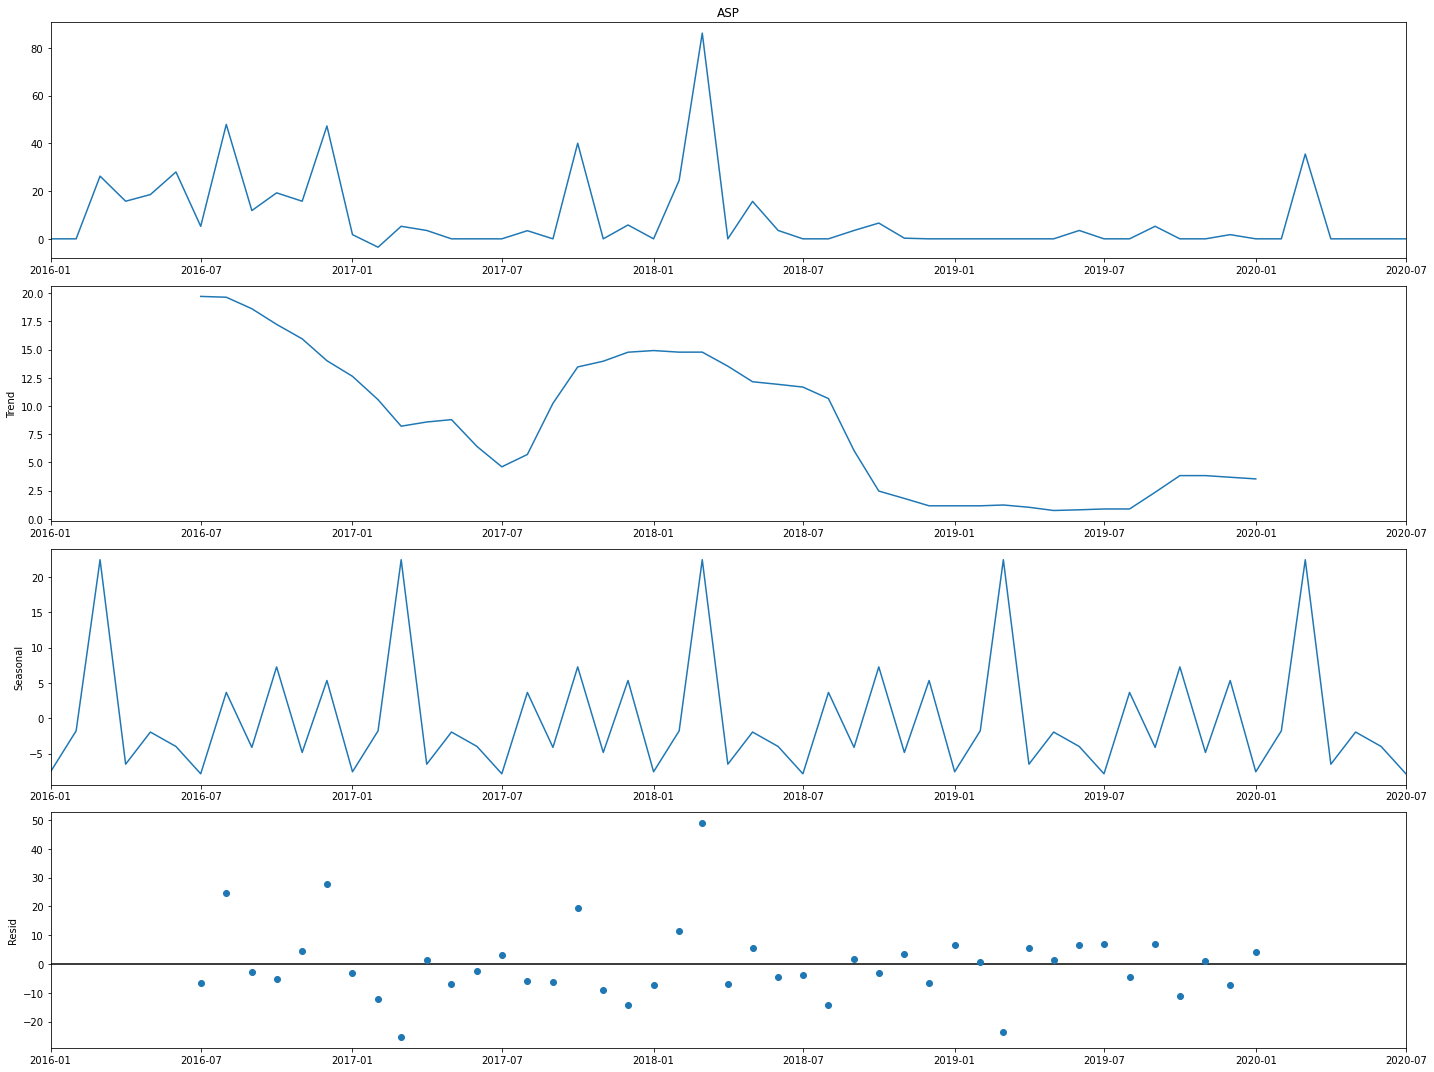

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from pylab import rcParams
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
res = sm.tsa.seasonal_decompose(df_govt.ASP)
res.plot()
plt.show()

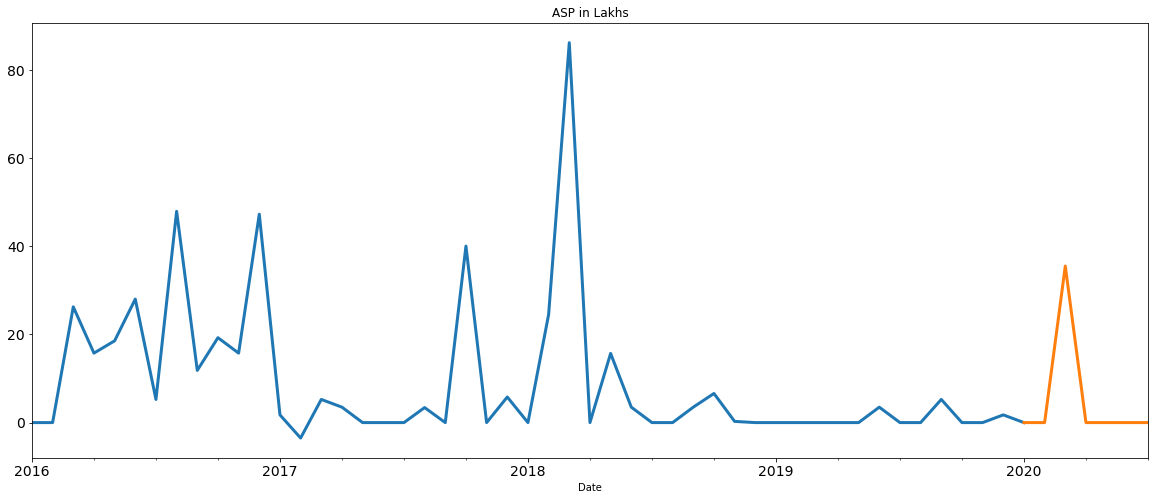

In [22]:
point = '2020-01-01'
train = df_govt[:point]
test = df_govt[point:]
#Plotting data
train.ASP.plot(figsize = (20,8), title = 'ASP in Lakhs', fontsize=14, lw = 3)
test.ASP.plot(figsize = (20,8), title = 'ASP in Lakhs', fontsize=14, lw = 3)
plt.show()

In [23]:
import warnings
warnings.filterwarnings("ignore") 
data = df_govt.copy()
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(df_govt['ASP'], start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, d = None, D = 1, trace = True, 
                          error_action ='ignore', suppress_warnings = True, stepwise = True)          

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=380.893, BIC=389.699, Time=0.429 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=397.577, BIC=401.099, Time=0.006 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=381.430, BIC=388.475, Time=0.157 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=379.201, BIC=386.246, Time=0.302 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=397.120, BIC=398.881, Time=0.007 seconds
Fit ARIMA(1,0,1)x(0,1,0,12) [intercept=True]; AIC=399.567, BIC=406.612, Time=0.090 seconds
Fit ARIMA(1,0,1)x(1,1,1,12) [intercept=True]; AIC=380.537, BIC=391.104, Time=0.601 seconds
Near non-invertible roots for order (1, 0, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
F

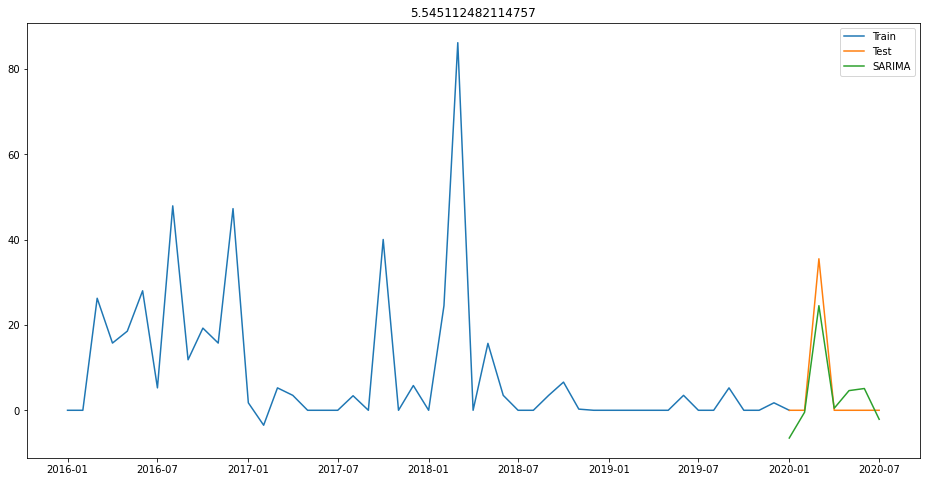

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
y_hat_avg = test.copy()
fit1 = SARIMAX(train.ASP, order=(2, 0, 2),seasonal_order=(0, 1, 1, 12)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start=test.index.min(), end=test.index.max(), dynamic=True)
output = pd.DataFrame(y_hat_avg['SARIMA']).merge(test, left_index=True, right_index=True).rename(columns={0:'Predicted', 'ASP':'Test'})
rms = sqrt(mean_squared_error(test.ASP, y_hat_avg.SARIMA))

plt.figure(figsize=(16,8))
plt.plot( train['ASP'], label='Train')
plt.plot(test['ASP'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.title(rms)
plt.show()

In [25]:
output

,SARIMA,Test
Date,,
2020-01-01,-6.502522,0.0
2020-02-01,-0.464020,0.0
2020-03-01,24.508858,35.5
2020-04-01,0.471850,0.0
2020-05-01,4.610730,0.0
2020-06-01,5.099021,0.0
2020-07-01,-2.110240,0.0


# 3. Networking

In [26]:
df_net = df[df['Customer Segment '] == 'Networking']
df_net[['ASP']].describe()

,ASP
count,55.000000
mean,10.311684
std,8.121975
min,0.000000
25%,3.757150
50%,10.314171
75%,15.016400
max,36.753600


In [27]:
df_net = pd.DataFrame(df_net.groupby(['Year', 'Month'])['ASP'].sum()).reset_index()
df_net['Date'] = pd.to_datetime(df_net.Year.astype(str) + '/' + df_net.Month.astype(str) + '/01')
df_net = df_net.sort_values('Date')
df_net = df_net.set_index('Date')
df_net = df_net[['ASP']]
df_net.index.freq = 'MS'
df_net.head()

,ASP
Date,
2016-01-01,10.367355
2016-02-01,8.928275
2016-03-01,6.597925
2016-04-01,7.253600
2016-05-01,7.203930


### Augmented Dickey-Fuller Test

### The more negative this ADF statistic, the more likely we are to reject the null hypothesis.

- **Null Hypothesis (H0):** If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

- **Alternate Hypothesis (H1):** The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

    - **p-value > 0.05:** Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
    - **p-value <= 0.05:** Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [28]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_net['ASP'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.910735
p-value: 0.000033
Critical Values:
	1%: -3.558
	5%: -2.917
	10%: -2.596


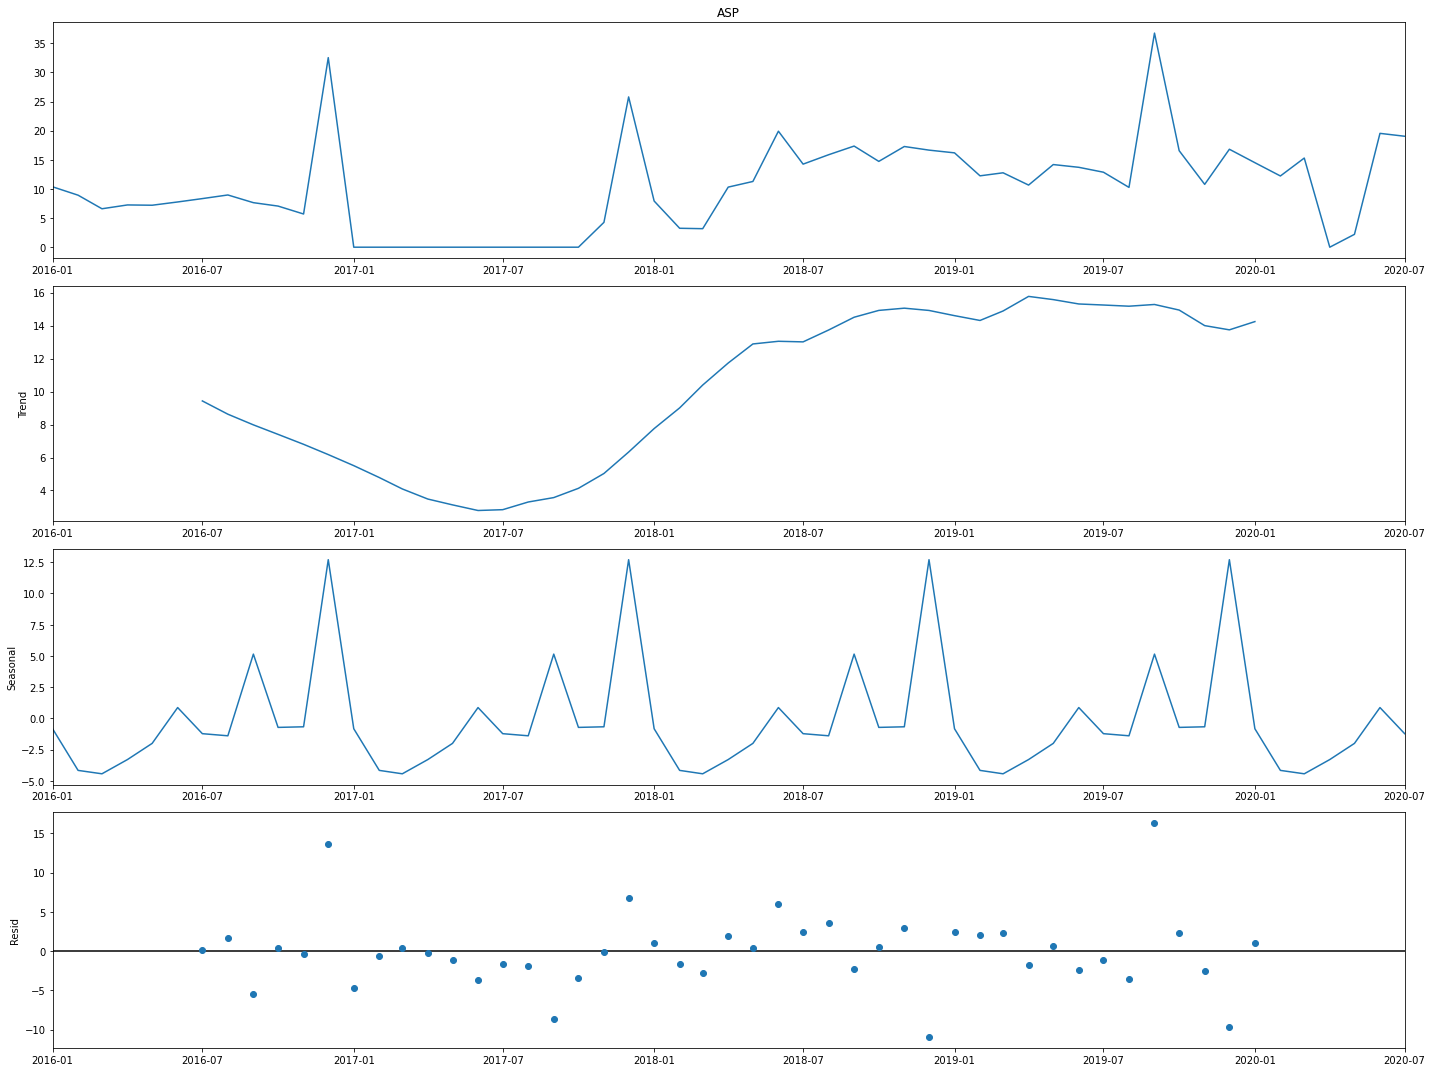

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from pylab import rcParams
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
res = sm.tsa.seasonal_decompose(df_net.ASP)
res.plot()
plt.show()

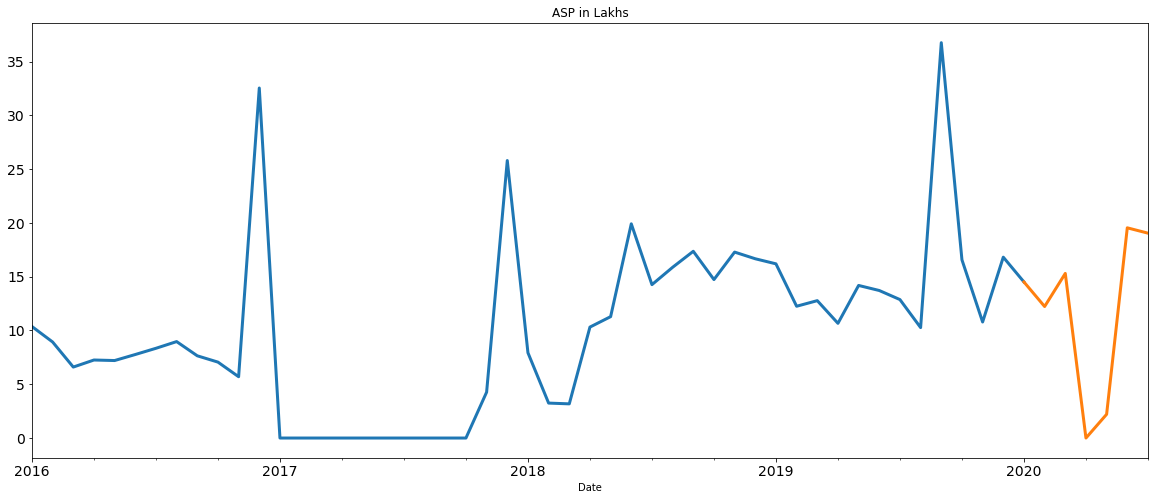

In [30]:
point = '2020-01-01'
train = df_net[:point]
test = df_net[point:]
#Plotting data
train.ASP.plot(figsize = (20,8), title = 'ASP in Lakhs', fontsize=14, lw = 3)
test.ASP.plot(figsize = (20,8), title = 'ASP in Lakhs', fontsize=14, lw = 3)
plt.show()

In [31]:
import warnings
warnings.filterwarnings("ignore") 
data = df_net.copy()
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(df_net['ASP'], start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, d = None, D = 1, trace = True, 
                          error_action ='ignore', suppress_warnings = True, stepwise = True)          

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=303.235, BIC=312.041, Time=0.188 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=317.023, BIC=320.545, Time=0.007 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=303.895, BIC=310.940, Time=0.128 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=308.149, BIC=315.194, Time=0.139 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=315.863, BIC=317.624, Time=0.006 seconds
Fit ARIMA(1,0,1)x(0,1,0,12) [intercept=True]; AIC=301.397, BIC=308.442, Time=0.054 seconds
Fit ARIMA(1,0,1)x(1,1,0,12) [intercept=True]; AIC=303.253, BIC=312.059, Time=0.152 seconds
Fit ARIMA(1,0,1)x(1,1,1,12) [intercept=True]; AIC=305.048, BIC=315.615, Time=0.652 seconds
Near non-invertible roots for order (1, 0, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(0,0,1)x(0,1,0,12) [intercept=True]; AIC=308.583, BIC=313.86

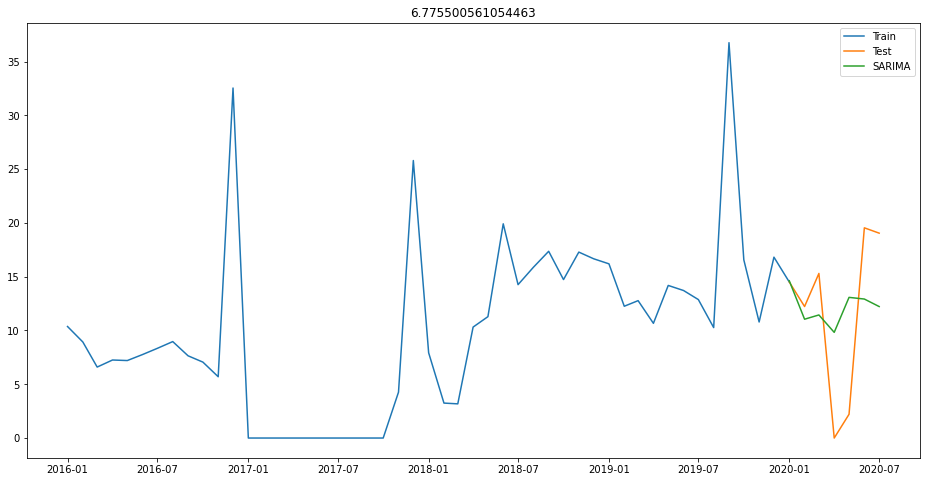

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
y_hat_avg = test.copy()
fit1 = SARIMAX(train.ASP, order=(1, 0, 1),seasonal_order=(1, 1, 1, 12)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start=test.index.min(), end=test.index.max(), dynamic=True)
output = pd.DataFrame(y_hat_avg['SARIMA']).merge(test, left_index=True, right_index=True).rename(columns={0:'Predicted', 'ASP':'Test'})
rms = sqrt(mean_squared_error(test.ASP, y_hat_avg.SARIMA))

plt.figure(figsize=(16,8))
plt.plot( train['ASP'], label='Train')
plt.plot(test['ASP'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.title(rms)
plt.show()

In [33]:
output

,SARIMA,Test
Date,,
2020-01-01,14.620286,14.5080
2020-02-01,11.046492,12.2264
2020-03-01,11.442263,15.3016
2020-04-01,9.824475,0.0000
2020-05-01,13.076554,2.2072
2020-06-01,12.921603,19.5424
2020-07-01,12.223317,19.0464


# 4. OEM

In [34]:
df_oem = df[df['Customer Segment '] == 'OEM']
df_oem[['ASP']].describe()

,ASP
count,55.000000
mean,61.576344
std,86.331718
min,0.000000
25%,5.875000
50%,28.817500
75%,72.528150
max,373.513880


In [35]:
df_oem = pd.DataFrame(df_oem.groupby(['Year', 'Month'])['ASP'].sum()).reset_index()
df_oem['Date'] = pd.to_datetime(df_oem.Year.astype(str) + '/' + df_oem.Month.astype(str) + '/01')
df_oem = df_oem.sort_values('Date')
df_oem = df_oem.set_index('Date')
df_oem = df_oem[['ASP']]
df_oem.index.freq = 'MS'
df_oem.head()

,ASP
Date,
2016-01-01,0.00000
2016-02-01,22.78000
2016-03-01,25.80000
2016-04-01,23.59329
2016-05-01,28.81750


### Augmented Dickey-Fuller Test

### The more negative this ADF statistic, the more likely we are to reject the null hypothesis.

- **Null Hypothesis (H0):** If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

- **Alternate Hypothesis (H1):** The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

    - **p-value > 0.05:** Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
    - **p-value <= 0.05:** Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [36]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_oem['ASP'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.905007
p-value: 0.329709
Critical Values:
	1%: -3.581
	5%: -2.927
	10%: -2.602


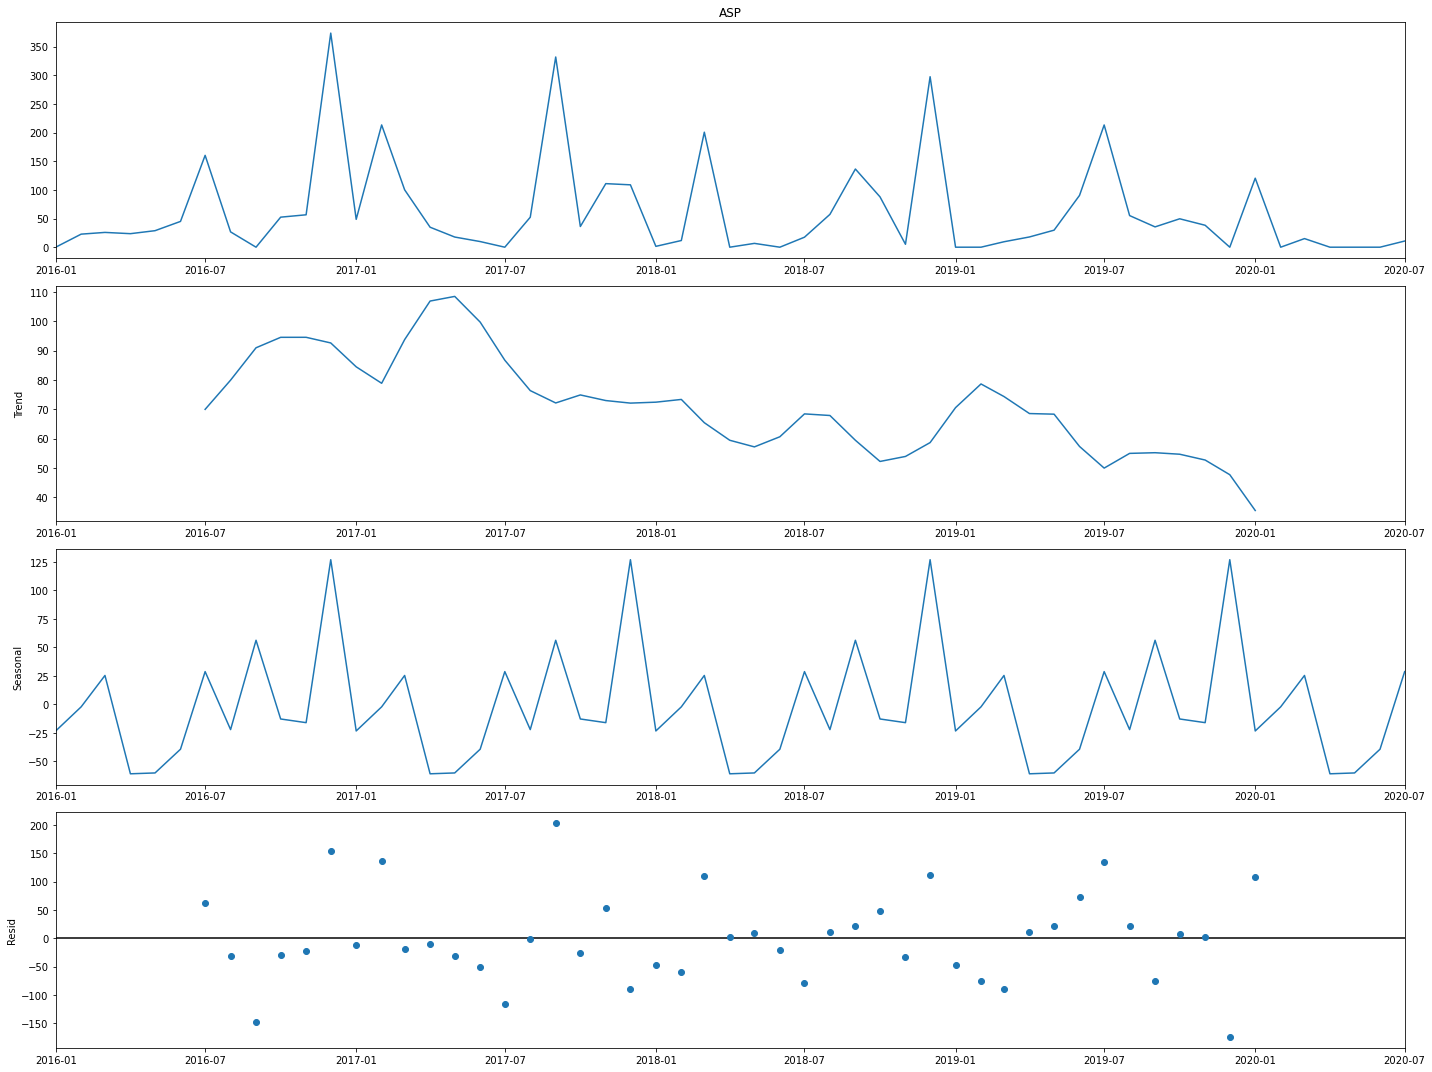

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from pylab import rcParams
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
res = sm.tsa.seasonal_decompose(df_oem.ASP)
res.plot()
plt.show()

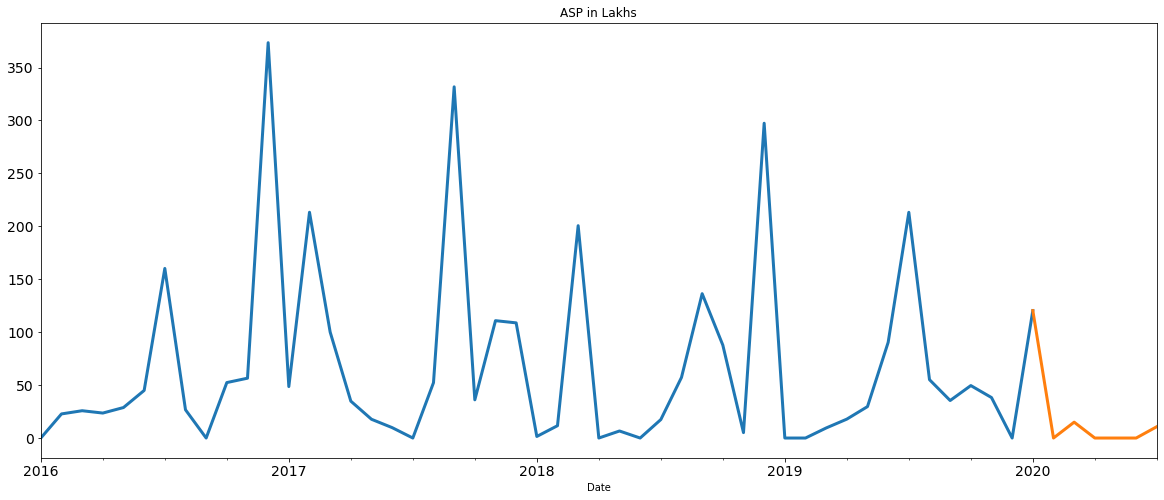

In [38]:
point = '2020-01-01'
train = df_oem[:point]
test = df_oem[point:]
#Plotting data
train.ASP.plot(figsize = (20,8), title = 'ASP in Lakhs', fontsize=14, lw = 3)
test.ASP.plot(figsize = (20,8), title = 'ASP in Lakhs', fontsize=14, lw = 3)
plt.show()

In [39]:
import warnings
warnings.filterwarnings("ignore") 
data = df_oem.copy()
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(df_oem['ASP'], start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, d = None, D = 1, trace = True, 
                          error_action ='ignore', suppress_warnings = True, stepwise = True)          

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=526.372, BIC=535.178, Time=0.452 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=539.329, BIC=542.851, Time=0.007 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=528.259, BIC=535.304, Time=0.248 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=524.437, BIC=531.482, Time=0.344 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=537.702, BIC=539.464, Time=0.008 seconds
Fit ARIMA(1,0,1)x(0,1,0,12) [intercept=True]; AIC=542.378, BIC=549.423, Time=0.107 seconds
Fit ARIMA(1,0,1)x(1,1,1,12) [intercept=True]; AIC=525.427, BIC=535.995, Time=0.383 seconds
Near non-invertible roots for order (1, 0, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
F

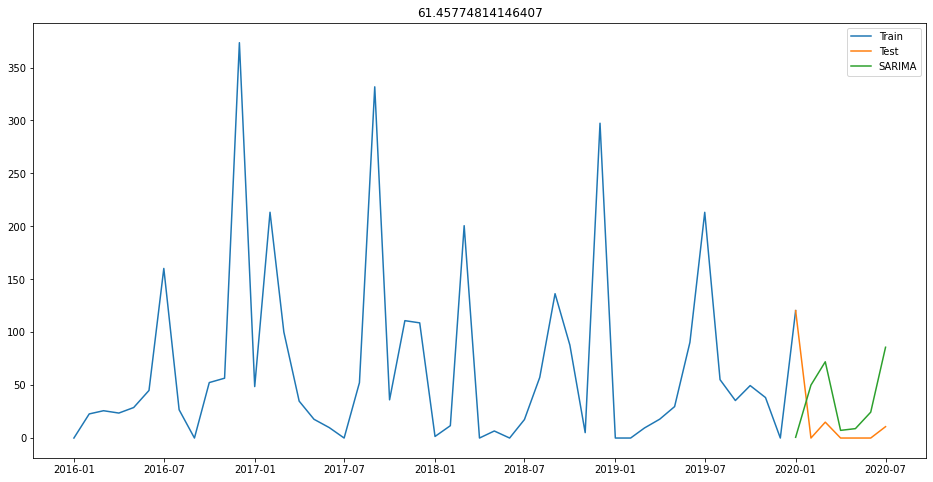

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
y_hat_avg = test.copy()
fit1 = SARIMAX(train.ASP, order=(0, 0, 0),seasonal_order=(0, 1, 1, 12),trend='c').fit()
y_hat_avg['SARIMA'] = fit1.predict(start=test.index.min(), end=test.index.max(), dynamic=True)
output = pd.DataFrame(y_hat_avg['SARIMA']).merge(test, left_index=True, right_index=True).rename(columns={0:'Predicted', 'ASP':'Test'})
rms = sqrt(mean_squared_error(test.ASP, y_hat_avg.SARIMA))

plt.figure(figsize=(16,8))
plt.plot( train['ASP'], label='Train')
plt.plot(test['ASP'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.title(rms)
plt.show()

In [41]:
output

,SARIMA,Test
Date,,
2020-01-01,0.695496,120.38050
2020-02-01,50.009350,0.00000
2020-03-01,72.056555,15.00000
2020-04-01,7.238959,0.00000
2020-05-01,8.884479,0.00000
2020-06-01,24.438061,0.00000
2020-07-01,85.771023,10.73808


# 5. Service

In [42]:
df_ser = df[df['Customer Segment '] == 'Service']
df_ser[['ASP']].describe()

,ASP
count,55.000000
mean,52.331561
std,18.314917
min,0.000000
25%,43.558165
50%,53.417010
75%,62.772343
max,97.236324


In [43]:
df_ser = pd.DataFrame(df_ser.groupby(['Year', 'Month'])['ASP'].sum()).reset_index()
df_ser['Date'] = pd.to_datetime(df_ser.Year.astype(str) + '/' + df_ser.Month.astype(str) + '/01')
df_ser = df_ser.sort_values('Date')
df_ser = df_ser.set_index('Date')
df_ser = df_ser[['ASP']]
df_ser.index.freq = 'MS'
df_ser.head()

,ASP
Date,
2016-01-01,39.269113
2016-02-01,61.855786
2016-03-01,46.544646
2016-04-01,34.512346
2016-05-01,59.929424


### Augmented Dickey-Fuller Test

### The more negative this ADF statistic, the more likely we are to reject the null hypothesis.

- **Null Hypothesis (H0):** If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

- **Alternate Hypothesis (H1):** The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

    - **p-value > 0.05:** Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
    - **p-value <= 0.05:** Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [44]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_ser['ASP'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.009984
p-value: 0.000000
Critical Values:
	1%: -3.558
	5%: -2.917
	10%: -2.596


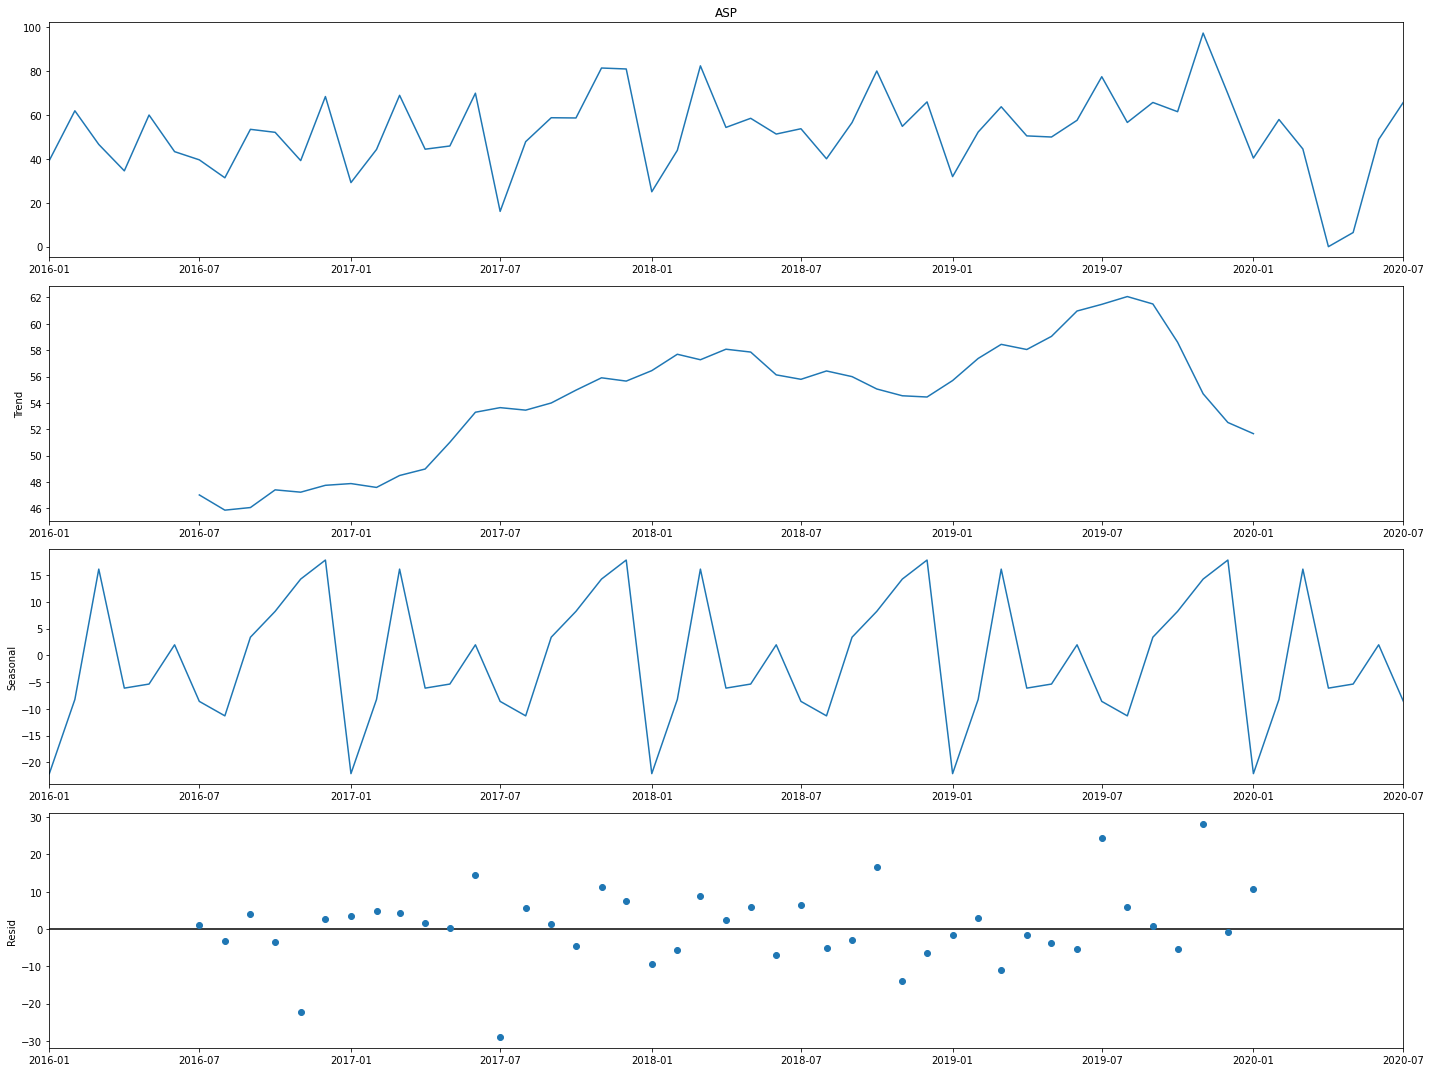

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from pylab import rcParams
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
res = sm.tsa.seasonal_decompose(df_ser.ASP)
res.plot()
plt.show()

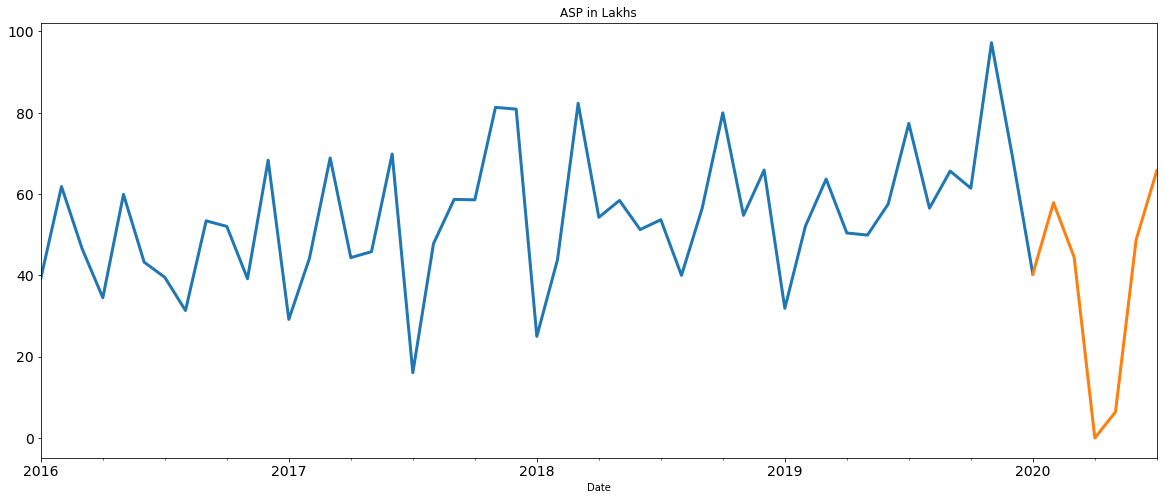

In [46]:
point = '2020-01-01'
train = df_ser[:point]
test = df_ser[point:]
#Plotting data
train.ASP.plot(figsize = (20,8), title = 'ASP in Lakhs', fontsize=14, lw = 3)
test.ASP.plot(figsize = (20,8), title = 'ASP in Lakhs', fontsize=14, lw = 3)
plt.show()

In [47]:
import warnings
warnings.filterwarnings("ignore") 
data = df_ser.copy()
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(df_ser['ASP'], start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, d = None, D = 1, trace = True, 
                          error_action ='ignore', suppress_warnings = True, stepwise = True)          

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=384.242, BIC=393.048, Time=0.223 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=383.543, BIC=387.065, Time=0.007 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=383.176, BIC=390.221, Time=0.121 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=382.437, BIC=389.481, Time=0.199 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=381.660, BIC=383.421, Time=0.008 seconds
Fit ARIMA(0,0,0)x(1,1,0,12) [intercept=True]; AIC=382.832, BIC=388.115, Time=0.105 seconds
Fit ARIMA(0,0,0)x(0,1,1,12) [intercept=True]; AIC=382.182, BIC=387.465, Time=0.114 seconds
Fit ARIMA(0,0,0)x(1,1,1,12) [intercept=True]; AIC=384.052, BIC=391.097, Time=0.181 seconds
Fit ARIMA(1,0,0)x(0,1,0,12) [intercept=True]; AIC=385.229, BIC=390.513, Time=0.040 seconds
Fit ARIMA(0,0,1)x(0,1,0,12) [intercept=True]; AIC=385.280, BIC=390.563, Time=0.049 seconds
Fit ARIMA(1,0,1)x(0,1,0,12) [intercept=True]; 

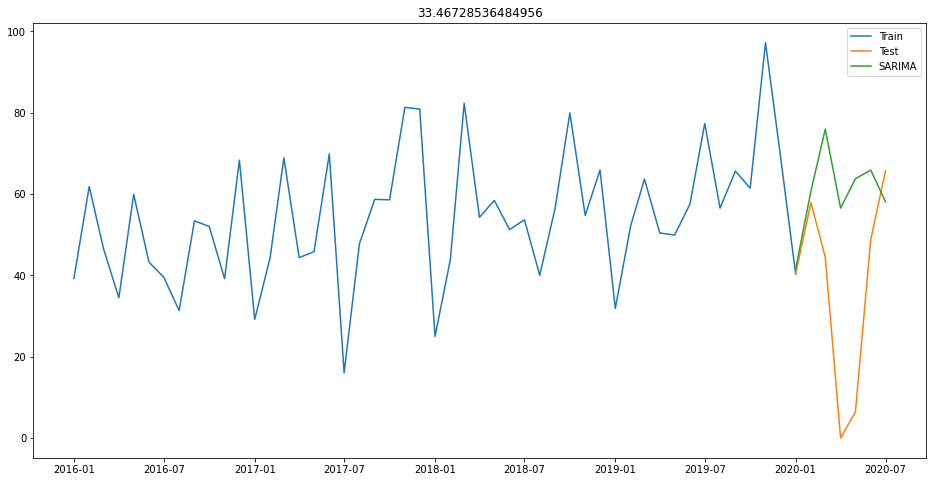

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
y_hat_avg = test.copy()
fit1 = SARIMAX(train.ASP, order=(0, 0, 0),seasonal_order=(0, 1, 1, 12),trend='c').fit()
y_hat_avg['SARIMA'] = fit1.predict(start=test.index.min(), end=test.index.max(), dynamic=True)
output = pd.DataFrame(y_hat_avg['SARIMA']).merge(test, left_index=True, right_index=True).rename(columns={0:'Predicted', 'ASP':'Test'})
rms = sqrt(mean_squared_error(test.ASP, y_hat_avg.SARIMA))

plt.figure(figsize=(16,8))
plt.plot( train['ASP'], label='Train')
plt.plot(test['ASP'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.title(rms)
plt.show()

In [49]:
output

,SARIMA,Test
Date,,
2020-01-01,41.563519,40.338784
2020-02-01,60.771378,57.894122
2020-03-01,75.968713,44.468303
2020-04-01,56.549535,0.000000
2020-05-01,63.774579,6.430842
2020-06-01,65.903195,48.785316
2020-07-01,58.079022,65.772139
